In [1]:
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten,AveragePooling2D,Conv2D
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler

In [1]:
import pandas as pd

# Data for the table
data = {
    "Model": ["AlexNet", "FFNN", "InceptionV3", "ResNet50", "VGG19"],
    "Significance": [
        "First CNN to demonstrate large-scale success in image classification.",
        "Baseline for comparing manually extracted features with automated deep learning features.",
        "Efficient multi-scale feature extraction for complex datasets.",
        "Deep architecture with residual connections for gradient stability.",
        "Consistent deep architecture for high accuracy in structured datasets."
    ],
    "Key Features": [
        "ReLU activation, dropout, overlapping pooling, 5 conv + 3 fully connected layers.",
        "Fully connected layers, simple structure, processes flattened image data.",
        "Inception modules, auxiliary classifiers, factorized convolutions.",
        "Residual blocks, batch normalization, 50 layers deep.",
        "Small 3x3 filters, sequential layers, powerful feature extraction, pre-trained weights for transfer learning."
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
file_path = "summary_of_model_significance.csv"
df.to_csv(file_path, index=False)

In [2]:
import pandas as pd

# Create the data for the table
data = {
    "Citation": [
        "Maryamah, 2023",
        "Stefan Rohrmanstorfer, 2021",
        "Yian Seo, K. Shin, 2018",
        "Ankit Bansal, 2023"
    ],
    "Main Findings": [
        "- The Inception V3 model achieved 92.86% accuracy and 92.85% F1-score.\n"
        "- Differentiated challenging classes like knitted items and scarves.\n"
        "- Successfully classified knitwear and jackets with high visual similarity.",

        "- Demonstrated the effectiveness of CNNs as the standard for image classification.\n"
        "- Incrementally improved validation accuracy from 69% to 84% using dropout layers, "
        "data augmentation, and transfer learning.\n"
        "- Classified distinct apparel like trousers and hats better than upper body clothes.",

        "- Used GoogLeNet pre-trained on ImageNet for better generalization.\n"
        "- Fine-tuned the network on a small fine-grained fashion dataset.\n"
        "- Achieved 62% accuracy over 10-fold experiments due to lack of labeled data and "
        "fine-grained categories.",

        "- Proposed a hybrid model combining CNN and SVM for fashion classification.\n"
        "- Binary classification (male/female) achieved 95.5% accuracy.\n"
        "- Multi-classification (ethnic, casual, formal, sportswear) achieved 96.24% accuracy "
        "for the formal class."
    ],
    "Algorithm Used": [
        "Inception V3 CNN",
        "CNN (Transfer Learning with TensorFlow)",
        "GoogLeNet CNN (Transfer Learning)",
        "Hybrid CNN + SVM"
    ],
    "Accuracy": [
        "92.86%",
        "84%",
        "62%",
        "96.24%"
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save as CSV
file_path = 'Fashion_Image_Classification_Comparison.csv'
df.to_csv(file_path, index=False)

file_path


'Fashion_Image_Classification_Comparison.csv'

## About LeNet-5 model

- LeNet model is implemented first in 1998 <br />
- It consists of 5 layers (3 conv + 2 fully connected layers)

- **Format** :
INPUT IMAGE ⇒ C1 ⇒ TANH ⇒ S2 ⇒ C3 ⇒ TANH ⇒ S4 ⇒ C5 ⇒ TANH ⇒ FC6 ⇒
SOFTMAX7
- But I am doing a bit modification here and using "relu" instead of "tanh"


## Loading Data and BASIC Preprocessing

In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [3]:
x_train,x_test = x_train.reshape(x_train.shape[0],28,28,1) / 255.0 ,x_test.reshape(x_test.shape[0],28,28,1) / 255.0

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

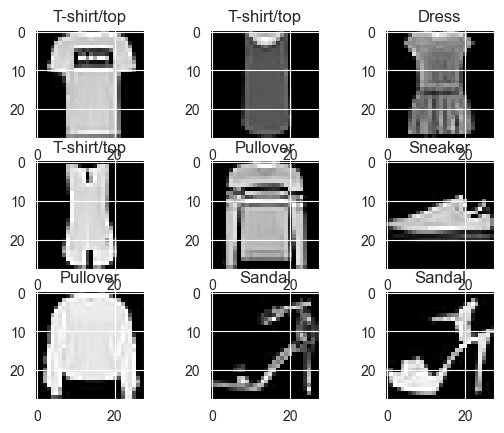

In [5]:
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(x_train[i],cmap="gray")
    plt.title(class_names[y_train[i]])

## Displaying Images

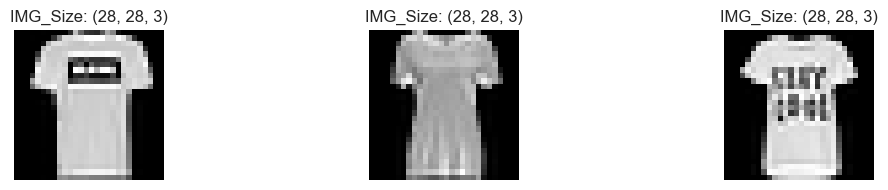

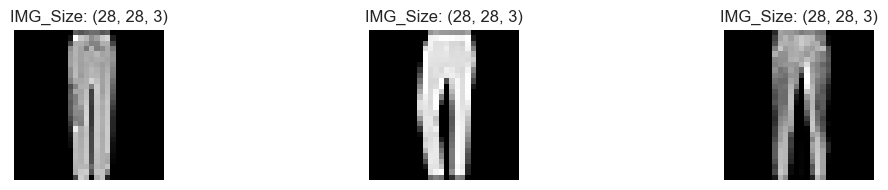

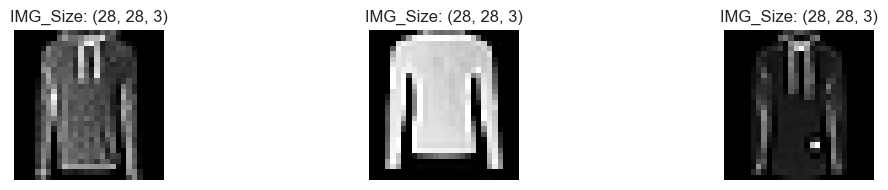

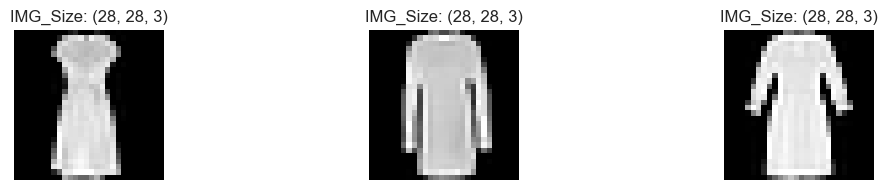

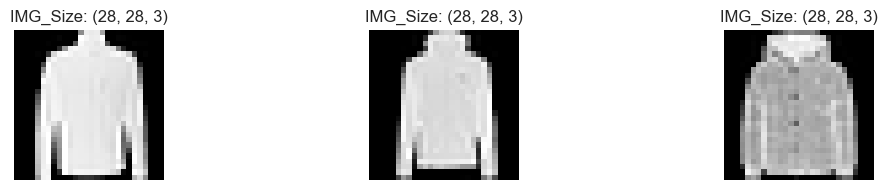

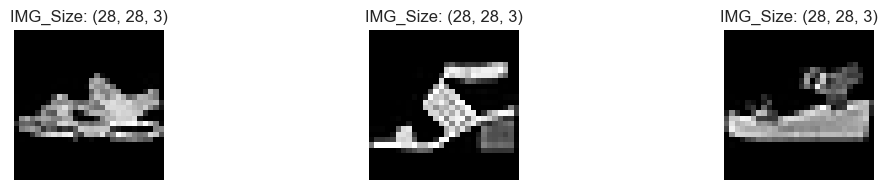

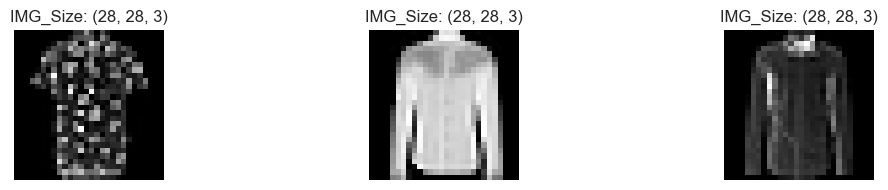

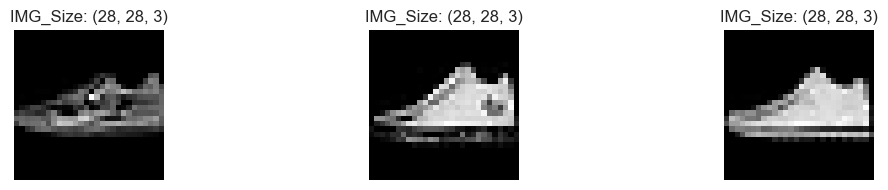

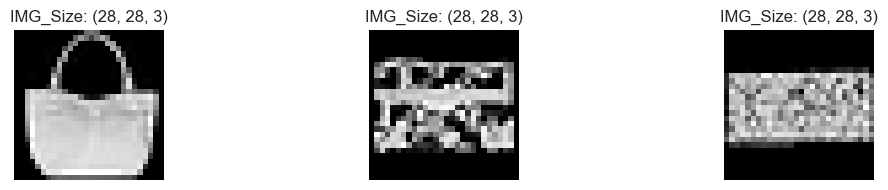

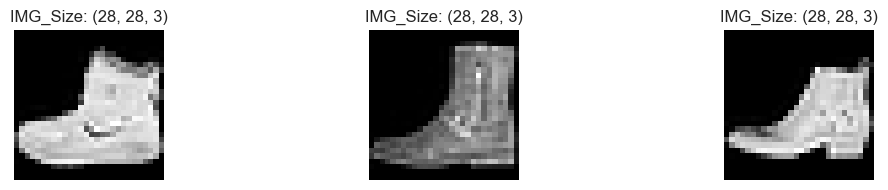

In [6]:
train_folder= 'train'
test_folder= 'test'

files = ['0', '1','2','3','4','5','6','7','8','9']

def Display_IMAGES(folder):
    for file in files:
        path = os.path.join(folder, file)
        fig, axes = plt.subplots(1, 3, figsize=(12, 2))
        for i, img in enumerate(os.listdir(path)[:3]):
            img_array = cv2.imread(os.path.join(path, img))

            # Display the image with size in the title
            img_shape = img_array.shape
            axes[i].imshow(img_array)
            axes[i].set_title(f"IMG_Size: {img_shape}")
            axes[i].axis('off')

        plt.tight_layout()

    plt.show()

Display_IMAGES(train_folder)

## Building LeNet-5 Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the LeNet-5 model with correct layer configuration
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),

    # Flatten layer to convert 2D data to 1D before Dense layers
    Flatten(),

    Dense(400, activation='relu'),  # Adjusted Dense layer to match the flattened output shape
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 10 classes for classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,106 (867.60 KB)

 Trainable params: 222,106 (867.60 KB)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["acc"])

In [12]:
hist = model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 400, but received input with shape (32, 256)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 28, 28, 1), dtype=float32)
  • training=True
  • mask=None

In [11]:
loss,acc = model.evaluate(x_test,y_test)
acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8913 - loss: 0.3832


0.890999972820282

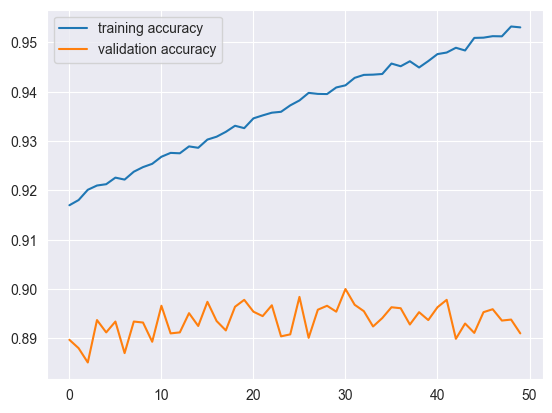

In [12]:
plt.plot(hist.history["acc"], label="training accuracy")
plt.plot(hist.history["val_acc"], label="validation accuracy")
plt.legend()

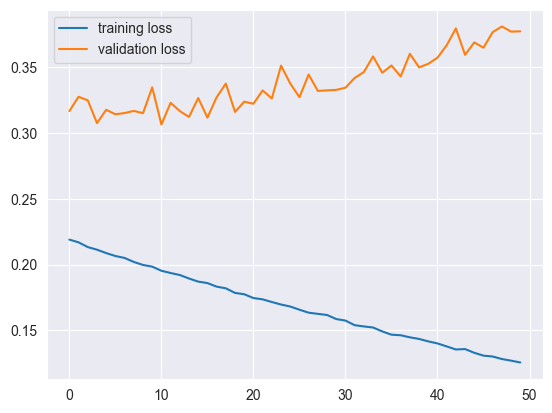

In [13]:
plt.plot(hist.history["loss"], label="training loss")
plt.plot(hist.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

In [24]:
# Saving the trained model
model.save("lenet5_model.h5")
print("Model saved as lenet5_model.h5")

Model saved as lenet5_model.h5
